In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Data/jena_climate_2009_2016.csv")

In [4]:
df.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
df.tail(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [6]:
features_selected = ['p (mbar)','T (degC)','rho (g/m**3)']
features = df[features_selected]
features.head()

,p (mbar),T (degC),rho (g/m**3)
0,996.52,-8.02,1307.75
1,996.57,-8.41,1309.80
2,996.53,-8.51,1310.24
3,996.51,-8.31,1309.19
4,996.51,-8.27,1309.00


In [7]:
# 항목명을 제외한 데이터만 추출
dataset = features.values
# 학습데이터 크기 만큼 추출
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)

# 정규화
dataset = (dataset-data_mean)-(data_std)
print(dataset)

[[ -1.05124686 -25.89350255  51.71209135]
 [ -1.00124686 -26.28350255  53.76209135]
 [ -1.04124686 -26.38350255  54.20209135]
 ...
 [  2.24875314 -21.03350255  32.35209135]
 [  2.23875314 -22.10350255  37.52209135]
 [  2.24875314 -22.69350255  40.34209135]]


In [8]:
#numpy를 이용한 행렬 연산 예
import numpy as np
mat1 = np.ones((3,3))
mat1


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [9]:
# 행렬과 행렬 연산 예제를 위한 요소값이 다른 행렬 생성
cnt = 1
mat2 = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        mat2[i,j] = mat1[i,j]*cnt
        cnt = cnt +1
mat2

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [10]:
mat3 = (mat1+mat2)*mat2 -mat1*mat2
mat3

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [11]:
mat4 = np.dot(mat2,mat3)
mat4

array([[ 180.,  246.,  324.],
       [ 378.,  525.,  702.],
       [ 576.,  804., 1080.]])

In [12]:
mat5 = np.matmul(mat2,mat3)
mat5

array([[ 180.,  246.,  324.],
       [ 378.,  525.,  702.],
       [ 576.,  804., 1080.]])

In [13]:
# 행렬 x 벡터 연산 예제를 위한 벡터 생성
vec = np.array([1,2,3])
print(vec)
# 행렬 x 벡터 연산 numpy.dot과 numpy.matmul 비교
mat6 = np.dot(mat2,vec)
print(mat6)

mat7 = np.matmul(mat2,vec)
print(mat7)

[1 2 3]
[14. 32. 50.]
[14. 32. 50.]


In [14]:
# TensorFlow를 이용한 텐서 연산 예시
import tensorflow as tf
mat1 = tf.Variable(tf.ones([3,3],tf.float32))
mat1

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [15]:
# 행렬과 행렬 연산 예제를 위한 요소값이 다른 행렬 생성
cnt = 1
mat2 = tf.Variable(tf.zeros(3,3),tf.float32)
for i in range(3):
    for j in range(3):
        mat2[i,j] = mat1[i,j]*cnt
        cnt = cnt + 1
mat2

TypeError: 'ResourceVariable' object does not support item assignment

In [16]:
# tf.reshape을 이용하여 행렬과 행렬 연산 예제를 위한 텐서 만들기
import numpy as np
mat_temp = np.array([1,2,3,4,5,6,7,8,9])
mat2 = tf.reshape(mat_temp,[3,3])
mat2 = tf.cast(mat2,tf.float32)
mat2

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [17]:
mat3 = (mat1+mat2)*mat2 - mat1*mat2
mat3

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]], dtype=float32)>

In [19]:
mat4 = tf.dot(mat2,mat3)
mat4

AttributeError: module 'tensorflow' has no attribute 'dot'

In [20]:
mat5 = tf.matmul(mat2,mat3)
mat5

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 180.,  246.,  324.],
       [ 378.,  525.,  702.],
       [ 576.,  804., 1080.]], dtype=float32)>

In [21]:
vec = tf.Variable([1,2,3],dtype=tf.float32)
vec

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [22]:
vec = tf.reshape(vec,(3,1))

In [24]:
mat6 = tf.dot(mat2,vec)
mat6

AttributeError: module 'tensorflow' has no attribute 'dot'

In [25]:
mat7 = tf.matmul(mat2,vec)
mat7

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[14.],
       [32.],
       [50.]], dtype=float32)>

In [26]:
# pytorch를 이용한 텐서 연산
import torch as th
mat1 = th.ones([3,3],dtype=th.float32)
mat1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [27]:
cnt = 1
mat2 = th.zeros([3,3],dtype=th.float32)

for i in range(3):
    for j in range(3):
        mat2[i,j] = mat1[i,j]*cnt
        cnt = cnt+1
mat2

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [29]:
mat4 = th.dot(mat2,mat3)
mat4

TypeError: dot(): argument 'tensor' (position 2) must be Tensor, not tensorflow.python.framework.ops.EagerTensor

In [30]:
mat3 = (mat1+mat2)*mat2-mat1*mat2
mat3

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [31]:
mat5 = th.matmul(mat2,mat3)
mat5

tensor([[ 180.,  246.,  324.],
        [ 378.,  525.,  702.],
        [ 576.,  804., 1080.]])

In [32]:
# 행렬 x 벡터 연산 예제를 위한 벡터 생성
vec = th.tensor([1,2,3],dtype=th.float32)
vec

tensor([1., 2., 3.])

In [33]:
# 행렬x벡터 연산을 위한 torch.dot과 torch.matmul 비교
mat6 = th.dot(mat2,vec)
mat6

RuntimeError: 1D tensors expected, but got 2D and 1D tensors

In [34]:
# 행렬x벡터 연산을 위한 torch.dot과 torch.matmul 비교
mat7 = th.matmul(mat2,vec)
mat7

tensor([14., 32., 50.])

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
batch_size = 64
test_batch_size = 1000
epochs = 50
lr = 0.001
momentum = 0.01
gpu_use = True
log_interval = 200

In [36]:
# GPU 확인
cuda_use = gpu_use and torch.cuda.is_available()
device = torch.device("cuda" if cuda_use else "cpu")
print(cuda_use)
print("set hyperparameters done")

False
set hyperparameters done


In [37]:
## 모든 데이터 자료구조를 tensor로 변환
transform = transforms.Compose([transforms.ToTensor()])

## torch.util.data 리스트에 저장된 URL을 통해 데이터 입력
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',train=True,download=True,transform=transform),
    batch_size = batch_size,shuffle=True
)

test_loader  = torch.utils.data.DataLoader(
    datasets.MNIST('../data',train=False,download=True,transform=transform),
    batch_size = batch_size,shuffle=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 107650530.14it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21428567.81it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29629545.17it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11723402.32it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [38]:
print(len(train_loader.dataset))
print(len(test_loader.dataset))
print('data loading done')

60000
10000
data loading done


In [39]:
## MLP 모델 설계
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,400)
        self.fc2 = nn.Linear(400,150)
        self.fc3 = nn.Linear(150,50)
        self.fc4 = nn.Linear(50,10)
    def forward(self,x):
        x = x.float()
        x = x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(x,dim=1)
        return x
print('model design done')

model design done


In [40]:
model = Net().to(device)
## 최적화 SGD
optimizer = optim.SGD(model.parameters(),lr=lr,momentum=momentum)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)


In [41]:
def train(log_interval,model,device,train_loader,optimizer,epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(train_loader):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval==0:
            print('Train Epoch:{} [{}/{} ({:.0f}%)] \ tLoss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_loader.dataset),
                                                                            100.*batch_idx/len(train_loader),loss.item()))

In [42]:
## MLP 모델 검증 루틴 정의
def test(log_interval,model,device,test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data,target in test_loader:
            data,target = data.to(device),target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output,target,reduction='sum').item()

            pred = output.argmax(dim=1,keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy:{}/{} ({:.0f}%) \n'.format(test_loss,correct,len(test_loader.dataset),
                                                                                 100.*correct / len(test_loader.dataset)))

In [43]:
# MLP 모델 학습
for epoch in range(1,epochs):
    train(log_interval,model,device,train_loader,optimizer,epoch)
    test(log_interval,model,device,test_loader)
torch.save(model,'./model.pt')

Train Epoch:1 [0/60000 (0%)] \ tLoss: 2.297736
Train Epoch:1 [12800/60000 (21%)] \ tLoss: 2.301420
Train Epoch:1 [25600/60000 (43%)] \ tLoss: 2.308401
Train Epoch:1 [38400/60000 (64%)] \ tLoss: 2.299233
Train Epoch:1 [51200/60000 (85%)] \ tLoss: 2.299198

Test set: Average loss: 2.3018, Accuracy:1444/10000 (14%) 

Train Epoch:2 [0/60000 (0%)] \ tLoss: 2.305381
Train Epoch:2 [12800/60000 (21%)] \ tLoss: 2.285352
Train Epoch:2 [25600/60000 (43%)] \ tLoss: 2.302297
Train Epoch:2 [38400/60000 (64%)] \ tLoss: 2.300548
Train Epoch:2 [51200/60000 (85%)] \ tLoss: 2.299370

Test set: Average loss: 2.2995, Accuracy:1713/10000 (17%) 

Train Epoch:3 [0/60000 (0%)] \ tLoss: 2.284347
Train Epoch:3 [12800/60000 (21%)] \ tLoss: 2.291163
Train Epoch:3 [25600/60000 (43%)] \ tLoss: 2.285462
Train Epoch:3 [38400/60000 (64%)] \ tLoss: 2.295170
Train Epoch:3 [51200/60000 (85%)] \ tLoss: 2.296650

Test set: Average loss: 2.2971, Accuracy:1840/10000 (18%) 

Train Epoch:4 [0/60000 (0%)] \ tLoss: 2.301091
Train

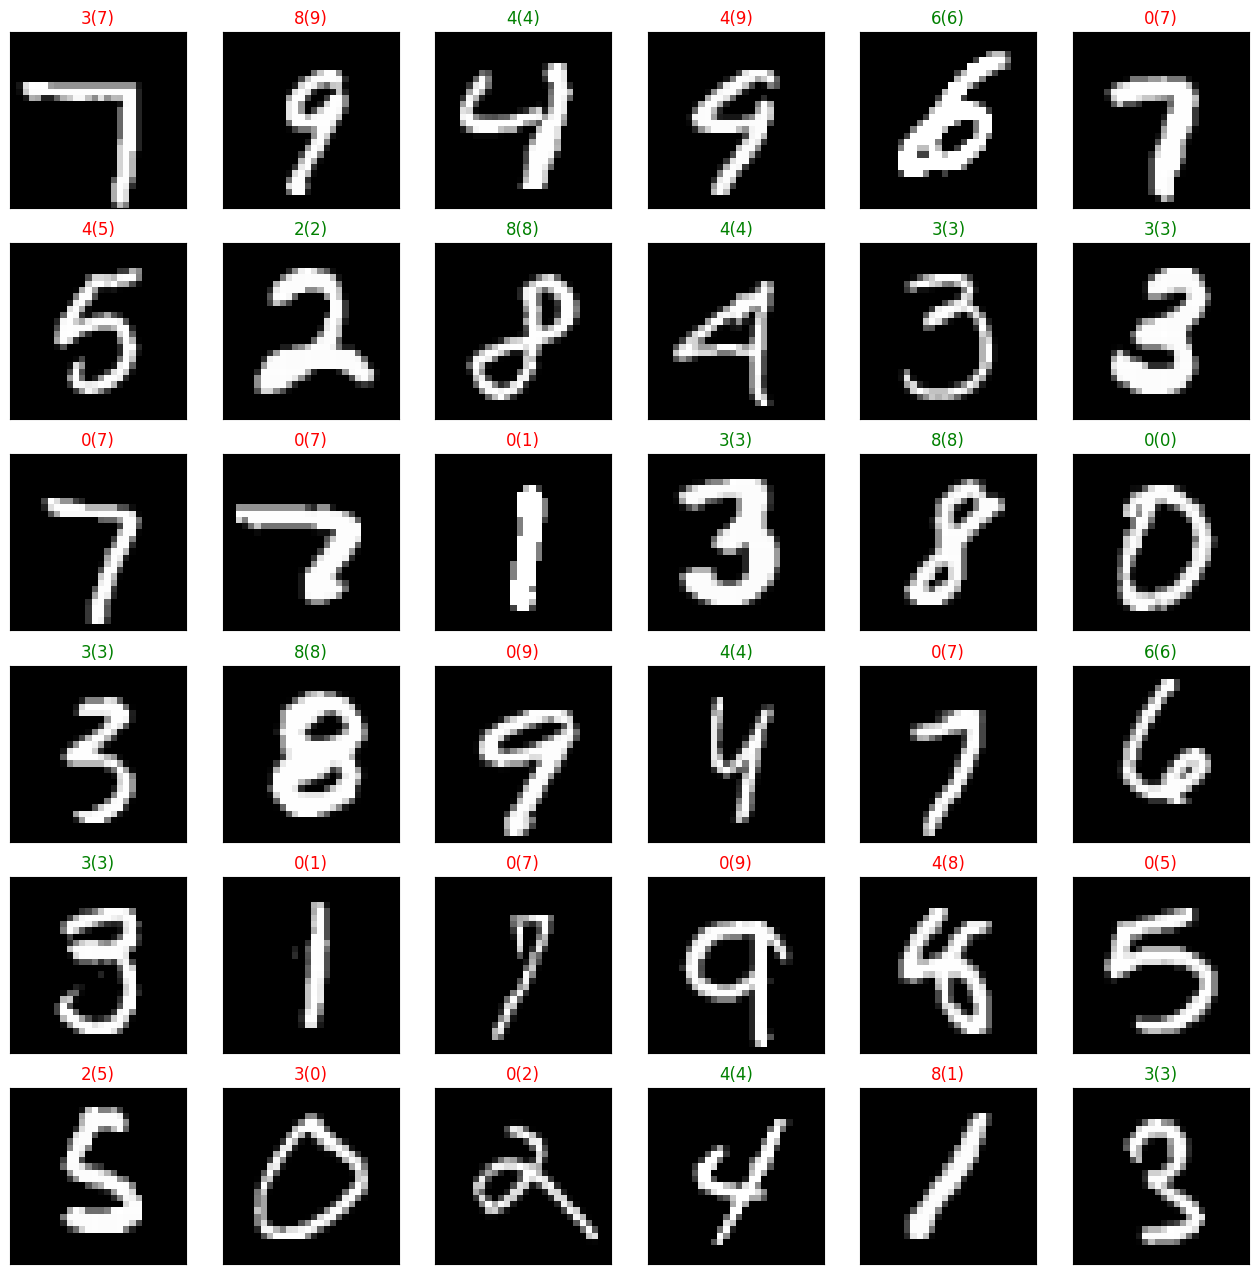

In [44]:
## Test 데이터셋에서 배치크기만큼 이미지 추출
images, labels = next(iter(test_loader))

## 학습된 MLP 모델을 통해 예측값 출력
output  = model(images)
## 10개의 성분을 가지는 예측값 벡터에서 최대의 확률을 가지는 인덱스를 예측값으로 변환
_, preds = torch.max(output,1)
## 이미지 plot을 위해 텐서에서 numpy 자료구조로 변환
images = images.numpy()
## 이미지 plot: 레이블과 예측값이 다르면 적색으로 표시 ()안이 레이블
fig = plt.figure(figsize=(16,16))
for idx in np.arange(36):
    ax = fig.add_subplot(6,6,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    ax.set_title("{}({})".format(str(preds[idx].item()),str(labels[idx].item())),
                 color = ("green" if preds[idx]==labels[idx] else "red"))